In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from network import RetinaNet
import torch

img_mean = np.array([0.485, 0.456, 0.406])
img_std = np.array([0.229, 0.224, 0.225])

def visualize_anchor(image, bboxes):
    _, axes = plt.subplots(3,2, figsize=(15, 15))
    axes = axes.flatten()
    img_plt = image[0].permute(1,2,0).cpu().numpy()
    img_plt = img_std * img_plt + img_mean
    img_plt = np.clip(img_plt, 0, 1)
    for i, bbox in enumerate(bboxes):
        axes[i].imshow(img_plt)
        for b in bbox:
            x1, y1, x2, y2 = b
            rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, 
                                    linewidth=1, edgecolor='r', 
                                    facecolor='none')
            axes[i].text(x1, y1-10, 'anchor', color='r')
            axes[i].add_patch(rect)

In [3]:
model = RetinaNet(fpn=True, p67=True)

/Users/haiyang/miniconda3/envs/assignment3/lib/python3.10/site-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


torch.Size([1, 36, 23, 42])


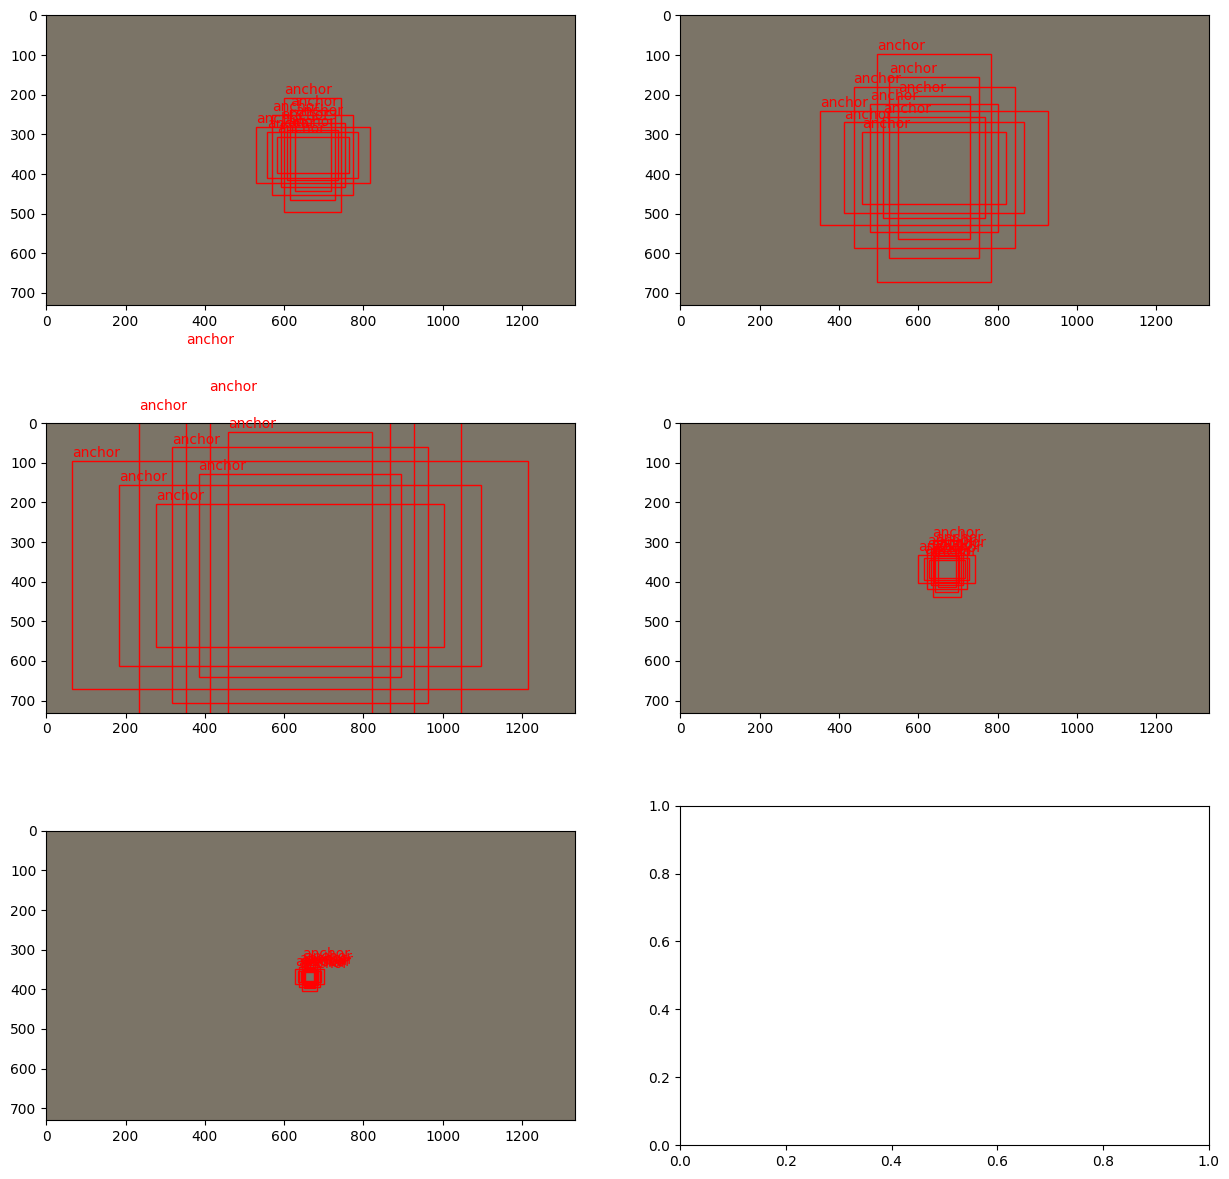

In [4]:
image = torch.zeros((1, 3, 731, 1333)).float()
outs = model(image)
anchor_pyramid = []
a,b,c = outs[0]
print(c.shape)
for out in outs:
    _, _, anchor = out
    B, A, H, W = anchor.shape
    anchor = anchor.reshape(B, A // 4, 4, H, W).squeeze(0).cpu().numpy()
    anchor_pyramid.append(anchor[..., H//2, W//2])
visualize_anchor(image, anchor_pyramid)